<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/SingleGraphs/GameStatGraphs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library for NFL Data
!pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13188 sha256=0db1e4165a5ed9180edb09f50d8ec335b215be37a15be1bc2727dd8f68838f50
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = nfl.import_pbp_data([2023])
ftn = nfl.import_ftn_data([2023])

2023 done.
Downcasting floats.
Downcasting floats.


In [ ]:
data.head(200)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23847 entries, 0 to 23846
Columns: 384 entries, play_id to n_defense
dtypes: float32(202), int32(8), int64(1), object(173)
memory usage: 50.8+ MB


In [7]:
ftn_sort = ftn.sort_values("nflverse_game_id", ascending = True).reset_index(drop = True)
ftn_sort.head()

,ftn_game_id,nflverse_game_id,season,week,ftn_play_id,nflverse_play_id,starting_hash,qb_location,n_offense_backfield,n_defense_box,is_no_huddle,is_motion,is_play_action,is_screen_pass,is_rpo,is_trick_play,is_qb_out_of_pocket,is_interception_worthy,is_throw_away,read_thrown,is_catchable_ball,is_contested_ball,is_created_reception,is_drop,is_qb_sneak,n_blitzers,n_pass_rushers,is_qb_fault_sack,date_pulled
0,6172,2023_01_ARI_WAS,2023,1,1011226,2238,L,S,1.0,1,False,False,False,False,False,False,False,False,False,1,True,False,False,False,False,0,3,False,2023-11-03 00:40:01.173828+00:00
1,6172,2023_01_ARI_WAS,2023,1,1011260,3145,R,S,1.0,2,False,False,False,False,False,False,False,False,False,CHK,True,False,False,False,False,0,4,False,2023-11-03 00:40:01.173828+00:00
2,6172,2023_01_ARI_WAS,2023,1,1011261,3170,0,0,0.0,0,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00
3,6172,2023_01_ARI_WAS,2023,1,1011262,3196,L,U,1.0,6,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00
4,6172,2023_01_ARI_WAS,2023,1,1011263,3225,R,S,2.0,7,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00


In [8]:
ftn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23159 entries, 0 to 23158
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   ftn_game_id             23159 non-null  int32              
 1   nflverse_game_id        23159 non-null  object             
 2   season                  23159 non-null  int32              
 3   week                    23159 non-null  int32              
 4   ftn_play_id             23159 non-null  int32              
 5   nflverse_play_id        23159 non-null  int32              
 6   starting_hash           23159 non-null  object             
 7   qb_location             23159 non-null  object             
 8   n_offense_backfield     21024 non-null  float32            
 9   n_defense_box           23159 non-null  int32              
 10  is_no_huddle            23159 non-null  bool               
 11  is_motion               23159 non-null  b

In [9]:
size = ftn.groupby("nflverse_game_id").size().reset_index()

ftn_sort = ftn.sort_values("nflverse_game_id").reset_index(drop = True)
size.info()
ftn_sort.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflverse_game_id  136 non-null    object
 1   0                 136 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,ftn_game_id,nflverse_game_id,season,week,ftn_play_id,nflverse_play_id,starting_hash,qb_location,n_offense_backfield,n_defense_box,is_no_huddle,is_motion,is_play_action,is_screen_pass,is_rpo,is_trick_play,is_qb_out_of_pocket,is_interception_worthy,is_throw_away,read_thrown,is_catchable_ball,is_contested_ball,is_created_reception,is_drop,is_qb_sneak,n_blitzers,n_pass_rushers,is_qb_fault_sack,date_pulled
0,6172,2023_01_ARI_WAS,2023,1,1011226,2238,L,S,1.0,1,False,False,False,False,False,False,False,False,False,1,True,False,False,False,False,0,3,False,2023-11-03 00:40:01.173828+00:00
1,6172,2023_01_ARI_WAS,2023,1,1011260,3145,R,S,1.0,2,False,False,False,False,False,False,False,False,False,CHK,True,False,False,False,False,0,4,False,2023-11-03 00:40:01.173828+00:00
2,6172,2023_01_ARI_WAS,2023,1,1011261,3170,0,0,0.0,0,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00
3,6172,2023_01_ARI_WAS,2023,1,1011262,3196,L,U,1.0,6,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00
4,6172,2023_01_ARI_WAS,2023,1,1011263,3225,R,S,2.0,7,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,0,0,False,2023-11-03 00:40:01.173828+00:00


In [ ]:
data_ftn = data.merge(ftn, left_on="game_id", right_on="nflverse_game_id")

data_ftn.head()

In [4]:
pfr = nfl.import_weekly_pfr("pass", [2023])

pfr = pfr.rename(columns={"team": "posteam"})

pfr.head()

,game_id,pfr_game_id,season,week,game_type,posteam,opponent,pfr_player_name,pfr_player_id,passing_drops,passing_drop_pct,receiving_drop,receiving_drop_pct,passing_bad_throws,passing_bad_throw_pct,times_sacked,times_blitzed,times_hurried,times_hit,times_pressured,times_pressured_pct,def_times_blitzed,def_times_hurried,def_times_hitqb
0,2023_01_DET_KC,202309070kan,2023,1,REG,KC,DET,Patrick Mahomes,MahoPa00,5.0,0.135,NaN,NaN,7.0,0.189,0.0,5.0,1.0,7.0,8.0,0.178,NaN,NaN,NaN
1,2023_01_DET_KC,202309070kan,2023,1,REG,DET,KC,Jared Goff,GoffJa00,3.0,0.091,NaN,NaN,4.0,0.121,1.0,12.0,0.0,3.0,4.0,0.111,NaN,NaN,NaN
2,2023_01_CAR_ATL,202309100atl,2023,1,REG,ATL,CAR,Desmond Ridder,RiddDe00,1.0,0.056,NaN,NaN,2.0,0.111,4.0,5.0,1.0,1.0,6.0,0.273,NaN,NaN,NaN
3,2023_01_CAR_ATL,202309100atl,2023,1,REG,CAR,ATL,Bryce Young,YounBr01,0.0,0.000,NaN,NaN,8.0,0.258,2.0,7.0,8.0,4.0,14.0,0.333,NaN,NaN,NaN
4,2023_01_HOU_BAL,202309100rav,2023,1,REG,BAL,HOU,Lamar Jackson,JackLa00,1.0,0.048,NaN,NaN,2.0,0.095,4.0,9.0,1.0,4.0,9.0,0.290,NaN,NaN,NaN


In [ ]:
pass_data = data[data['play_type'] == "pass"]

pass_epa = pass_data.groupby(["game_id",'posteam'])['qb_epa'].sum().reset_index()
pass_plays = pass_data.groupby(["game_id",'posteam']).size().reset_index(name = "pass_plays")

pass_epa["pass_epa_per_play"] = pass_epa["qb_epa"] / pass_plays["pass_plays"]

pass_epa.head()

In [ ]:
pfr_game = pd.merge(pass_epa, pfr, on=['game_id', 'posteam'])

pfr_game.head()

In [50]:
ngs_pass = nfl.import_ngs_data("passing", [2023]).reset_index(drop = True)

ngs_pass = ngs_pass[["week", "player_display_name", "team_abbr","attempts"]]
ngs_pass = ngs_pass[ngs_pass["week"] != 0]

ngs_pass = ngs_pass.rename(columns={"team_abbr": "posteam"})

ngs_pass = ngs_pass.sort_values(by=['attempts'], ascending=False)

ngs_pass.head()

,week,player_display_name,posteam,attempts
132,3,Andy Dalton,CAR,58
96,2,Matthew Stafford,LAR,55
212,6,Gardner Minshew,IND,55
229,7,Derek Carr,NO,55
44,1,Mac Jones,NE,54


In [63]:
pass_game = pd.merge(pfr_game, ngs_pass, on=['posteam', "week"])


pass_game = pass_game[pass_game['pfr_player_name'] == pass_game['player_display_name']].reset_index(drop = True)

pass_game = pass_game[pass_game["attempts"] > 20].reset_index(drop = True)
pass_game.head()

,game_id,posteam,qb_epa,pass_epa_per_play,pfr_game_id,season,week,game_type,opponent,pfr_player_name,pfr_player_id,passing_drops,passing_drop_pct,receiving_drop,receiving_drop_pct,passing_bad_throws,passing_bad_throw_pct,times_sacked,times_blitzed,times_hurried,times_hit,times_pressured,times_pressured_pct,def_times_blitzed,def_times_hurried,def_times_hitqb,player_display_name,attempts
0,2023_01_ARI_WAS,ARI,-9.239668,-0.279990,202309100was,2023,1,REG,WAS,Joshua Dobbs,DobbJo00,0.0,0.000,NaN,NaN,1.0,0.033,3.0,9.0,1.0,1.0,5.0,0.152,NaN,NaN,NaN,Joshua Dobbs,30
1,2023_01_ARI_WAS,WAS,-13.413063,-0.362515,202309100was,2023,1,REG,ARI,Sam Howell,HoweSa00,2.0,0.069,NaN,NaN,2.0,0.069,6.0,9.0,1.0,0.0,7.0,0.179,NaN,NaN,NaN,Sam Howell,31
2,2023_01_BUF_NYJ,BUF,-1.372804,-0.030507,202309110nyj,2023,1,REG,NYJ,Josh Allen,AlleJo02,0.0,0.000,NaN,NaN,7.0,0.179,5.0,11.0,2.0,4.0,11.0,0.220,NaN,NaN,NaN,Josh Allen,41
3,2023_01_BUF_NYJ,NYJ,-5.221493,-0.208860,202309110nyj,2023,1,REG,BUF,Zach Wilson,WilsZa00,0.0,0.000,NaN,NaN,3.0,0.167,2.0,3.0,3.0,3.0,8.0,0.333,NaN,NaN,NaN,Zach Wilson,21
4,2023_01_CAR_ATL,CAR,-10.528563,-0.263214,202309100atl,2023,1,REG,ATL,Bryce Young,YounBr01,0.0,0.000,NaN,NaN,8.0,0.258,2.0,7.0,8.0,4.0,14.0,0.333,NaN,NaN,NaN,Bryce Young,38


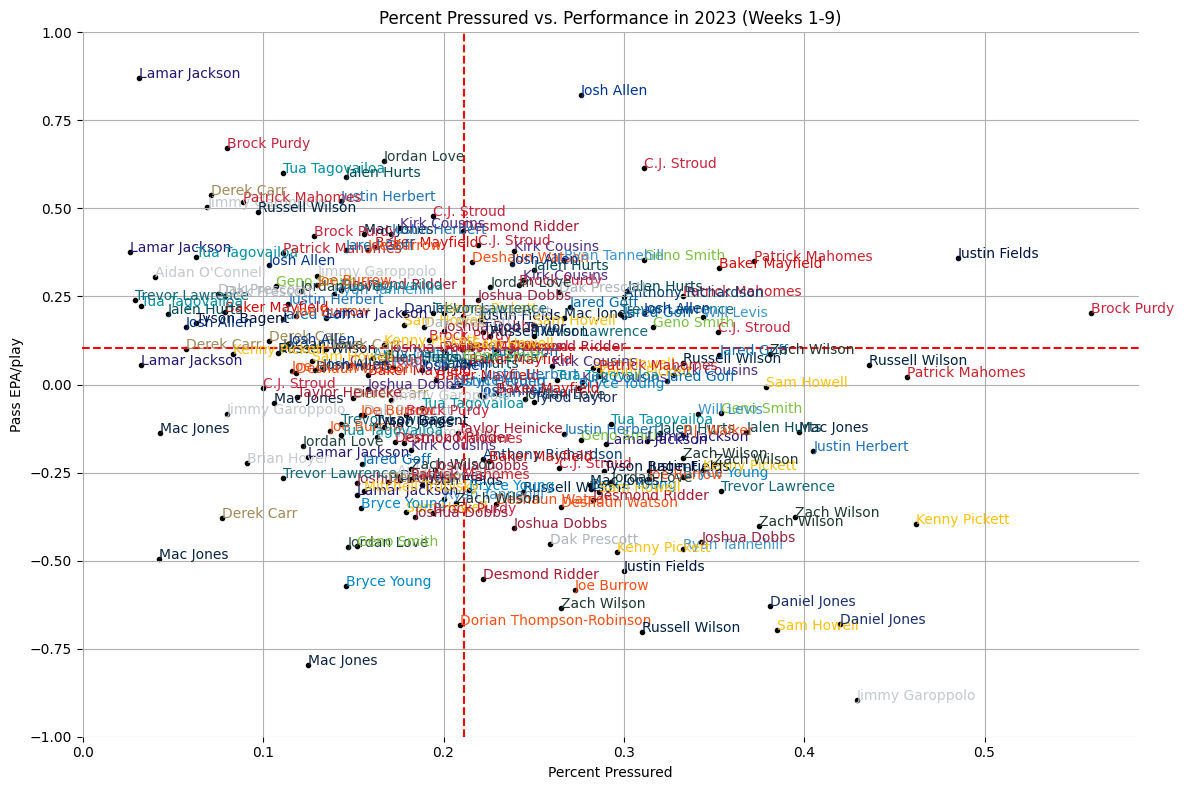

In [64]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team) for team in pass_game["posteam"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(pass_game["times_pressured_pct"], pass_game["pass_epa_per_play"], marker='.', color="black")

for i in range(len(pass_game)):
   # print(i)
    ax.annotate(pass_game["pfr_player_name"][i], (pass_game["times_pressured_pct"][i], pass_game["pass_epa_per_play"][i]), color=qb_colors[i])

mean_x = np.mean(pass_game["times_pressured_pct"])
mean_y = np.mean(pass_game["pass_epa_per_play"][i])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([-1, 1])
# plt.xlim([-0.35, 0.55])
# plt.yticks(np.arange(5, 11, 0.5))
# plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('Percent Pressured')
ax.set_ylabel('Pass EPA/play')
ax.set_title('Percent Pressured vs. Performance in 2023 (Weeks 1-9)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()